In [155]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

### Reading the Data

In [156]:
df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')

In [157]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* lma bnege nshtghl, fe columns bnbd2 nw23ha, 34an malhash lazma
* w lma bnshelha mn el test, lazm tshelha kman mn el train

In [158]:
passengerId = df_test.PassengerId

* hena ehna bn3ml feature selection
* bs hena m3mlnhash btre2a mo3yna, ehna bs olna el 7agat el 3ndy w 7asenha msh htfr2 awy y3ny.

In [159]:
cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_train.drop(columns=cols, inplace=True)
df_test.drop(columns=cols, inplace=True)


### Check the amount of nulls

In [160]:
df_train.isnull().mean() * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

In [161]:
df_test.isnull().mean() * 100

Pclass       0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Fare         0.239234
Embarked     0.000000
dtype: float64

### fill the nulls

In [162]:
## Filling Age using mean as it is numerical
df_train.Age.fillna(df_train['Age'].mean(), inplace=True)
df_test.Age.fillna(df_test['Age'].mean(), inplace=True)
## Filling Age using mode as it is categorical
#bn7ot el [0] de 34an lw fe kaza mode nakhud awl wahed bs w 34an trg3o ka series msh df
df_train.Embarked.fillna(df_train['Embarked'].mode()[0], inplace=True)
## Filling Fare 
df_test.Fare.fillna(df_test['Fare'].mean(), inplace=True)

### Converting all categories into numbers

In [163]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [164]:
## Mapping the embarked
Emb_mapping = {'S':0, 'C':1, 'Q':2}
df_train.Embarked = df_train.Embarked.map(Emb_mapping)
df_test.Embarked = df_test.Embarked.map(Emb_mapping)

In [165]:
df_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [166]:
## Mapping the embarked
Sex_mapping = {'male':0, 'female':1}
df_train.Sex = df_train.Sex.map(Sex_mapping)
df_test.Sex = df_test.Sex.map(Sex_mapping)

In [167]:
# check the data now 
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [168]:
# check the test now 
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


### Determine the outputs and inputs

In [169]:
Y = df_train.Survived
df_train.drop(columns=['Survived'], inplace=True)
X = df_train

In [170]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [171]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Feature Scaling
> we apply it beacuse we want to put all the features in the same range

> that is because it make it faster as the range decreases

> also this is because if they have very high difference in the range, the speed for finding the optimal local minimum it takes a lot of time which is much more than if we applied the feature scaling

* Standard Scaler -> usually best of them
    * Xnew = (Xold - mean) / (standardDiv)
* min-max Scaler 
    * Xnew = (Xold - mean) / (max(Xold) - min(Xold))   

> if you don't know which is better, you can try many of them and check whethere it affects the output or not.

In [172]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X = scaler.fit_transform(X)
df_test = scaler.fit_transform(df_test)

### Defining the Model using Logistic Regression

> we don't build the model by ourselves, but we call them from the libraries, it is easy task

In [173]:
# model
model = LogisticRegression()

# fit 
model.fit(X, Y)

#prediction 
y_pred = model.predict(df_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Defining the Model using KNN

In [174]:
from sklearn.neighbors import KNeighborsClassifier

# model
knn = KNeighborsClassifier(n_neighbors=15, p=1)

# fit
knn.fit(X, Y)

# predict
y_pred = model.predict(df_test)

y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Evaluating the Score

* To be able to evaluate the score we do this in one of two ways
    1. submitting the data on kaggle
    2. using the model.score(x_test, y_test)
* x_test is our normal input
* y_test is the actual output on which we compare the data 

### Casting the output as required on kaggle

In [175]:
submit = {
    'PassengerId' : passengerId,
    'Survived': y_pred
}
submit_df = pd.DataFrame(submit)
submit_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


### Saving the output as a csv file to be able to submit on kaggle

In [176]:
submit_df.to_csv('./Submit/submit.csv', index=False)

### Splitting the data

In [177]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [178]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### GridSearch
* it tries alot of possible values, defined in a map. 
* we use this method to get the best results for number of neighbours and which is better in approach, eucliden or manhaten
* but in general we use it when we have something we do in it a try and error approach
* CV is acrynom for cross validation
  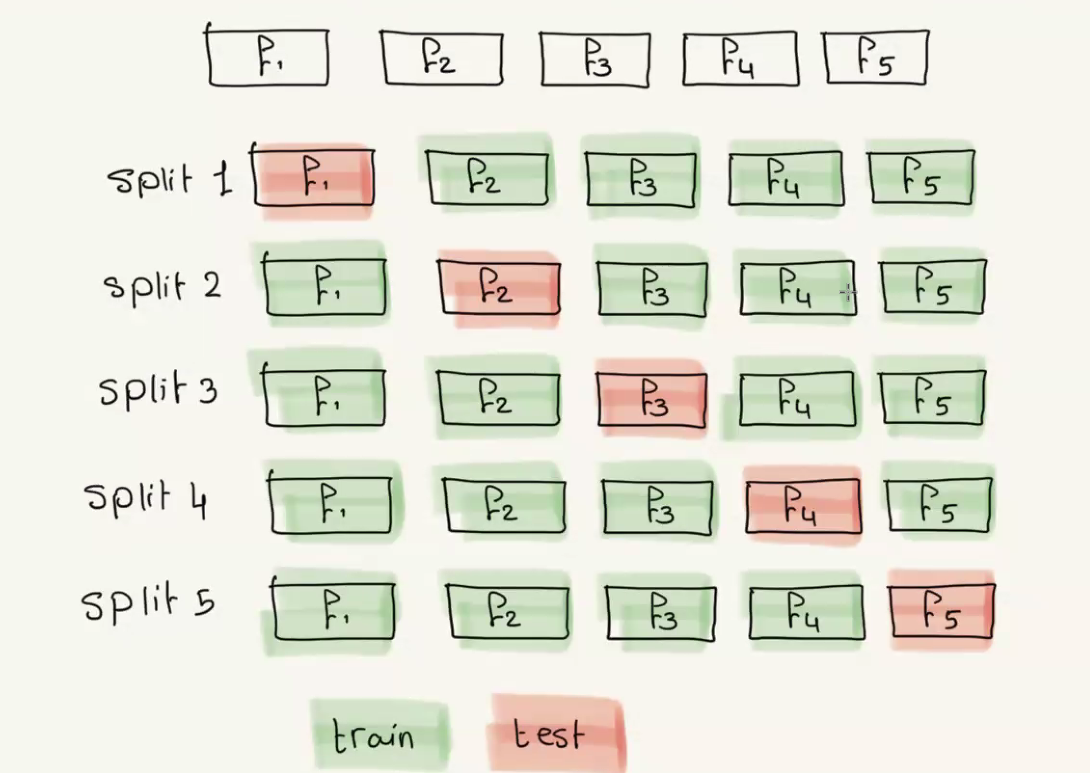
* el by7sl eno bya5ud feature aknha testing wl ba2y aknhom training w y3ml predict 3la asashom

In [179]:
model = KNeighborsClassifier()
param = {
    "n_neighbors" : list(range(1,50)), # in the function by default is 5
    "p" : [1,2] # if 1 -> manhaten, 2 -> Eucliden
}

clf = GridSearchCV(model, param)

clf.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]})

In [180]:
## clf gets the best values for the map
print(clf.best_params_)

{'n_neighbors': 15, 'p': 1}
